# CytoTRACE
* using cytotrace2 to map the trajectory between cDC1,cDC2 and mregDC
* see info here: https://github.com/digitalcytometry/cytotrace2/tree/main/cytotrace2_python

## Prepare data for cytotrace
* create two txt files: 
* gene expression file --> rows: genes, columns: cell IDs
* cell annotations file --> Column 1: cell IDs, column 2: cell annotations 

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import dandelion as ddl
import matplotlib.pyplot as plt

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [4]:
# only using DC
data_DC = data[data.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC"])]

In [5]:
data_DC

View of AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_a

In [5]:
# Make the expression file
expression_df = pd.DataFrame(
    data_DC.X.T,  
    index=data_DC.var.index,  # Set gene names as row indices
    columns=data_DC.obs.index  # Set cell IDs as column names
)

# Display the DataFrame
expression_df.head()

,GSE215120_AM1_AAATGCCCAGAGCCAA-1,GSE215120_AM1_ACACTGATCCACTGGG-1,GSE215120_AM1_ACAGCCGCAAACCTAC-1,GSE215120_AM1_ACCAGTAAGACTGGGT-1,GSE215120_AM1_ACGTCAACAAGGACTG-1,GSE215120_AM1_ACGTCAATCCGCATCT-1,GSE215120_AM1_ACTGAGTCAGGCTGAA-1,GSE215120_AM1_ACTGTCCGTCTCTTAT-1,GSE215120_AM1_ACTTGTTTCTGAAAGA-1,GSE215120_AM1_AGAGCTTGTACAGTTC-1,...,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CGGGCATTCTTCTGTA,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTACGGGGTGATCGTT,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTCATGCTCGTTAGAC,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTTGATTAGCAGGTCA,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GAGGGATCAAGCGCTC,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GTTTACTCAAGGCCTC,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TACCGAACAAACCGGA,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TCACGCTTCCGTCACT,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGCAGTAGTGTTGCCG,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGTGAGTTCGGAAACG
HES4,2.100430,3.452755,4.218359,-0.323357,-0.392818,-0.331008,-0.306740,-0.320882,-0.312021,-0.356277,...,-0.303529,-0.236081,-0.295836,-0.235505,-0.226924,-0.299287,-0.298367,-0.291317,-0.291651,-0.271114
ISG15,-0.380933,0.944106,1.471873,0.228329,0.613830,0.046307,-0.984695,-0.364538,-0.351820,-0.223009,...,-0.025469,0.931269,-0.226304,-0.576623,0.731378,0.483867,0.876842,-0.908661,-0.895117,-0.780945
TNFRSF18,2.628043,5.650237,-0.122990,-0.125734,-0.106020,-0.124636,-0.125048,-0.125863,-0.124997,-0.115076,...,-0.124450,-0.113257,-0.120143,-0.113432,-0.112191,-0.120684,-0.131582,-0.126496,-0.121923,-0.123205
TNFRSF4,5.070108,4.063953,-0.175611,-0.165770,-0.234417,-0.180716,5.608533,-0.174040,-0.168396,-0.207875,...,-0.157069,-0.152530,-0.166347,-0.145882,-0.157567,-0.177489,-0.143188,-0.170851,-0.177479,-0.153878
ATAD3C,-0.083031,-0.084595,-0.073887,-0.070054,-0.095923,-0.073671,-0.069898,-0.070967,-0.070526,-0.084446,...,-0.066246,-0.063251,-0.070049,-0.062090,-0.064733,-0.071872,-0.061709,-0.067103,-0.069721,-0.063604


In [6]:
# Make cell annotations file
annotations_df = pd.DataFrame({
    "annotation": data_DC.obs["NR_annotations_simple"]  # Use the annotation column
})

# Display the resulting DataFrame
annotations_df.head()

,annotation
GSE215120_AM1_AAATGCCCAGAGCCAA-1,cDC2
GSE215120_AM1_ACACTGATCCACTGGG-1,cDC2
GSE215120_AM1_ACAGCCGCAAACCTAC-1,cDC2
GSE215120_AM1_ACCAGTAAGACTGGGT-1,cDC1
GSE215120_AM1_ACGTCAACAAGGACTG-1,cDC1


In [6]:
#show current directory 
os.chdir('/scratch/user/s4436039/scdata/CytoTRACE')
os.getcwd()

'/scratch/user/s4436039/scdata/CytoTRACE'

In [8]:
# Save both dataframes as .txt
annotations_df.to_csv("annotations_df.txt", sep="\t", index=True)
expression_df.to_csv("expression_df.txt", sep="\t", index=True)

## Run CytoTRACE

In [7]:
from cytotrace2_py.cytotrace2_py import *

In [8]:
import argparse

In [ ]:
# 10min
input_path = "/scratch/user/s4436039/scdata/CytoTRACE/expression_df.txt" 
annots_path = "/scratch/user/s4436039/scdata/CytoTRACE/annotations_df.txt" 
species_type = "human"

results =  cytotrace2(input_path,
                     annotation_path=annots_path,
                     species=species_type,
                     max_cores=1
                     )

cytotrace2: Input parameters
    Input file: /scratch/user/s4436039/scdata/CytoTRACE/expression_df.txt
    Species: human
    Full model: False
    Parallelization enabled: True
    User-provided limit for number of cores to use: 1
    Batch size: 10000
    Smoothing batch size: 1000
    Max PCs: 200
    Seed: 14
    Output directory: cytotrace2_results
cytotrace2: Loading dataset
cytotrace2: Dataset characteristics
    Number of input genes:  1268
    Number of input cells:  30241
cytotrace2: Preprocessing
cytotrace2: 192 cores detected
cytotrace2: Running 1 prediction batch(es) in parallel using 1 cores for smoothing per batch.
cytotrace2: Initiated processing batch 1/4 with 7561 cells
cytotrace2: Initiated processing batch 2/4 with 7560 cells
cytotrace2: Initiated processing batch 3/4 with 7560 cells
cytotrace2: Initiated processing batch 4/4 with 7560 cells
    Mapped 1130 input gene names to mouse orthologs
    1130 input genes are present in the model features.


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:134: UserWarning:     Please verify the input species is correct.
    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowliste

    Mapped 1130 input gene names to mouse orthologs
    1130 input genes are present in the model features.


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:134: UserWarning:     Please verify the input species is correct.
    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowliste

    Mapped 1130 input gene names to mouse orthologs
    1130 input genes are present in the model features.


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:134: UserWarning:     Please verify the input species is correct.
    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowliste

    Mapped 1130 input gene names to mouse orthologs
    1130 input genes are present in the model features.


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:134: UserWarning:     Please verify the input species is correct.
    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowliste

cytotrace2: Plotting outputs


Preparing input for visualization.
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
  |======================================================================| 100%
Using method 'umap'
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


null device 
          1 
cytotrace2: Finished.


In [11]:
results.head()

,CytoTRACE2_Score,CytoTRACE2_Potency,CytoTRACE2_Relative,preKNN_CytoTRACE2_Score,preKNN_CytoTRACE2_Potency
GSE215120_AM1_AAATGCCCAGAGCCAA-1,0.063426,Differentiated,0.239269,0.039403,Differentiated
GSE215120_AM1_ACACTGATCCACTGGG-1,0.070940,Differentiated,0.322966,0.026497,Differentiated
GSE215120_AM1_ACAGCCGCAAACCTAC-1,0.057280,Differentiated,0.174636,0.021099,Differentiated
GSE215120_AM1_ACCAGTAAGACTGGGT-1,0.069412,Differentiated,0.307788,0.124960,Differentiated
GSE215120_AM1_ACGTCAACAAGGACTG-1,0.063654,Differentiated,0.242642,0.107926,Differentiated


In [13]:
unique_values = results['CytoTRACE2_Potency'].unique()
print(unique_values)

['Differentiated', 'Multipotent', 'Oligopotent', 'Pluripotent', 'Unipotent']
Categories (6, object): ['Differentiated' < 'Unipotent' < 'Oligopotent' < 'Multipotent' < 'Pluripotent' < 'Totipotent']


In [14]:
# check 
type_counts = results['CytoTRACE2_Potency'].value_counts()
print(type_counts)

CytoTRACE2_Potency
Differentiated    29688
Unipotent           184
Pluripotent         161
Multipotent         107
Oligopotent         101
Totipotent            0
Name: count, dtype: int64


In [15]:
# Ensure the cell IDs in metadata_df match the index of data_DC.obs
merged_obs = data_DC.obs.merge(results, left_index=True, right_index=True, how='left')

In [16]:
# Update the .obs attribute of the AnnData object
data_DC.obs = merged_obs

In [18]:
# Verify the new column is added
data_DC

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

In [19]:
colour_vars = ["CytoTRACE2_Potency","NR_annotations_simple"]

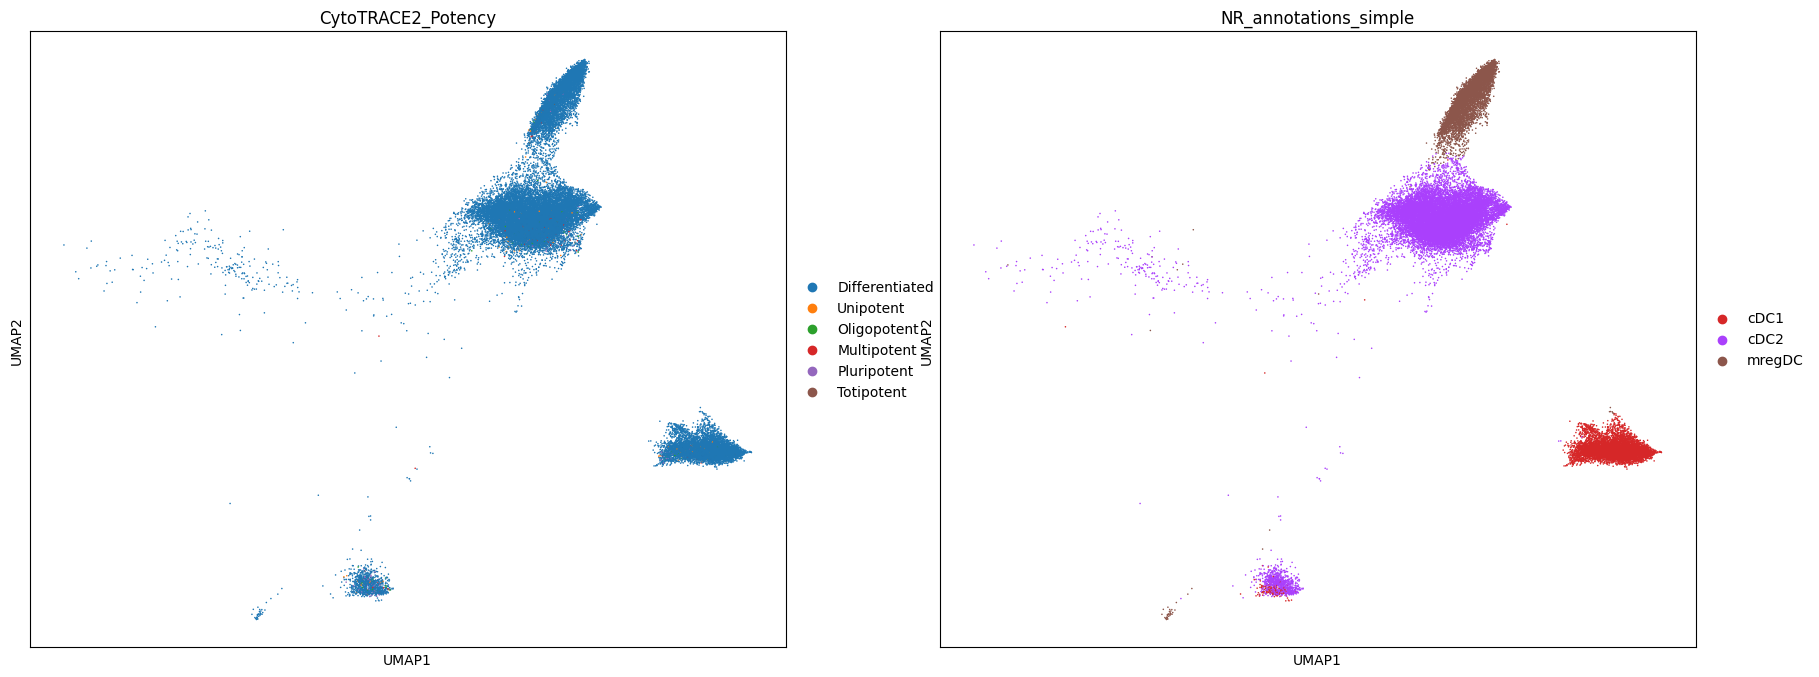

In [24]:
#plotting 
with plt.rc_context({"figure.figsize": (10, 8)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols=2, size=5)